# 5. Probability

In this notebook we start discussing probability. First we introduce two useful Python Libraries. 

## 5.1  Matplotlib and Numpy

A picture is worth a thousand words, so is it true in data science. Being able to visualizing results is a principal tool and we will use the [Matplotlib](https://matplotlib.org/#) library to view our results. To learn more about this library take a look at the visualization notebook. Another fundamental package for statistics in Python is [Numpy](http://www.numpy.org/). It has functions and methods for operations such as random number generation, matrix operations and basic statistical analysis. In the next few lectures we will explore the different classes and methods available in these library.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

The following cell presets the the figure configurations for the plots. 

In [3]:
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

## 5.2 Coin Flips

When it comes to probability calculations, coin flips are among the easiest events to deal with. Consider a fair coin (a coin that produces heads and tails with equal likelihood). Let $H$ be the event of getting heads as the outcome and $T$ the event of getting tails as the outcome. We now calculate $P(H)$. We know that

$$P(H)=P(T)$$ for a fair coin.

Also, 

$$P(H)+P(T)=1$$ 

by the axioms of probability. Thus, 

$$P(H)=\frac{1}{2}=0.5$$. 

Let us toss 10 fair coins and see the outcomes we get.

In [21]:
p=0.5
n=10
tosses=np.random.choice(["h","t"],p=[1-p,p], size=n)
print(tosses)

['t' 't' 't' 't' 'h' 'h' 'h' 'h' 't' 'h']


You may want to run the code again and see if you get a different sequence. You can also modify the number of coin-flips or the probability of heads.

You can also slightly beautify the printout.

In [9]:
print(', '.join(tosses))

h, h, h, h, h, h, t, t, h, t


Next, let us count the number of heads and tails.

In [22]:
heads = list(tosses).count("h")
tails = list(tosses).count("t")

print("{} heads and {} tails".format(heads,tails))

5 heads and 5 tails


Finally, let's visualize these numbers. You may want to run the code from the start a few times to get a feel for the different numbers of heads and tails you get. 

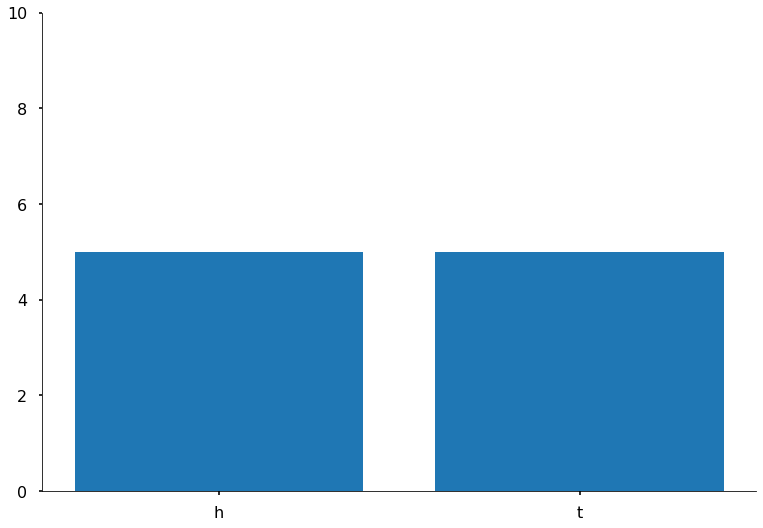

In [23]:
plt.bar([0,1],[heads,tails],tick_label=['h','t'],align='center')
plt.ylim([0,10])
plt.show()

We now perform `n_simulations` simulations, each emulates `n_tosses` coin flips and plots the fraction of heads as the number of tosses increases. 

Note: The code below uses '1' to represent heads and '0' to represent tails.

In [24]:
# This is a decorator that creates the slider
@widgets.interact(p=(0.0,1.0),n_tosses=(1,1000),n_simulations=(1, 5),continuous_update=False)
def simulate_coin_tosses(p,n_tosses,n_simulations):
    # Run the experiment n_simulations times
    for _ in range(n_simulations):
        # Create three arrays consisting of: the coin flips, their running sums, and partial estimates
        tosses = np.random.choice([0,1],p=[1-p,p], size=n_tosses)
        partial_sums = np.cumsum(tosses)
        partial_means =  partial_sums / np.arange(1,n_tosses+1)

        # Plot the partial estimates
        plt.plot(np.arange(1,n_tosses+1), partial_means)

    plt.plot(range(n_tosses), [p]* n_tosses, 'k', linewidth=5.0, label = 'p')  # plot the value p

    plt.xlabel('Number of coin tosses')
    plt.ylabel('Fraction of heads')
    plt.xlim([1, n_tosses]) # plot limits
    plt.legend()
    plt.show()


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), IntSlider(value=500, description='n_to…

We observe that the empirical probabilities approach the theoretical probability as the number of iterations increases.

## Reproducibility  

Dice throws are another easy experiment to conduct. But first let us look at how we can reproduce the sampled data. To do this we can set the `seed` value of the random number generator to a chosen value.

In [25]:
np.random.seed(666)
print(np.random.randint(9))

2


If we run the experiment again, we might get a different set of numbers.

In [26]:
print(np.random.randint(9))

6


In [27]:
np.random.seed(666)
print(np.random.randint(9))
print(np.random.randint(9))

2
6


## Tetrahedron Die - Events

In [30]:
n=10000
samples = np.random.choice([1,2,3,4],p=[0.1,0.2,0.3,0.4],size=n)
height,left = np.histogram(samples,bins=4,range=(1,5))
heights = height/n

<ipython-input-31-fca13e986a5d>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(left[:-1],heights,color=colors,tick_label=[1,2,3,4],align='center')


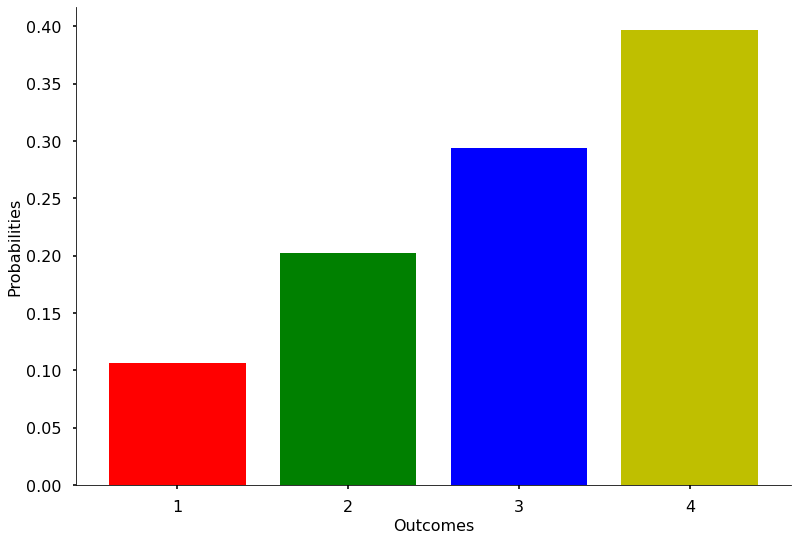

In [31]:
#plt.figure(figsize=(12,9))
colors='rgby'
plt.bar(left[:-1],heights,color=colors,tick_label=[1,2,3,4],align='center')
plt.xlabel("Outcomes", fontsize=16)
plt.ylabel("Probabilities", fontsize=16)
plt.show()

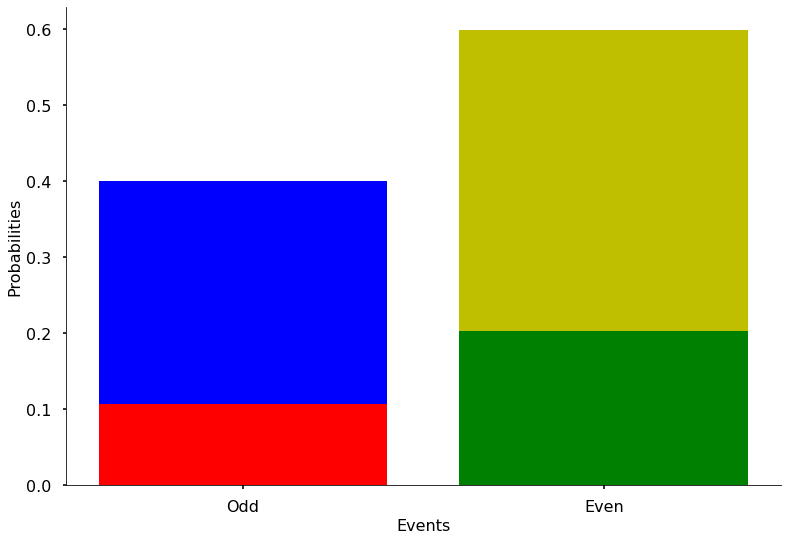

In [33]:
plt.bar([0,1],[0,0],tick_label=['Odd','Even'],align='center')
plt.bar([0,1],[heights[0],0],color='r',align='center')
plt.bar([0,1],[heights[2],0],color='b',bottom=[heights[0],0],align='center')
plt.bar([0,1],[0,heights[1]],color='g',align='center')
plt.bar([0,1],[0,heights[3]],color='y',bottom=[0,heights[1]],align='center')
plt.xlabel("Events", fontsize=16)
plt.ylabel("Probabilities", fontsize=16)
plt.show()

## 5.2 Die Rolls

Now consider a fair die. Each face has probability $\frac16$. We simulate $n$ die rolls and plot the empirical probability of each face, alongside the theoretical probability. 

In [34]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,1000),continuos_update=False)
def probability_plot(n):
    Outcomes = np.random.randint(6, size = n)
    Count = np.zeros((6,n+1))
    Prob = np.zeros((6,n+1))
    
    #Counting the occurance of each event
    for i in range(1,n+1):
        Count[:,i] = Count[:,i-1]
        Count[Outcomes[i-1],i]+=1

    # plot the empirical values
    for i in range(6):
        Prob = Count[i,1:]/np.arange(1,n+1)
        plt.plot(np.arange(1, n + 1), Prob, linewidth=2.0, label='Face '+str(i+1))
    
    plt.plot(range(0, n), [1 / 6] * n, 'k', linewidth=3.0, label='Theoretical probability')
    plt.title("Empirical and theoretical probabilities of the 6 faces")
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=505, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

Next consider the event $E=\{2,4,6\}$ that the outcome is even. Clearly $P(E)=\frac36=\frac{1}{2}=0.5$.

The next cell simulates $n$ die rolls and plots the theoretical and empirical probabilities of $E$.

In [35]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),continuous_update=False)
def probability_plot_B(n):
    Outcomes = 1 + np.random.randint(6, size = 10000)
    Count_E = np.zeros((2,n+1))
    
    # Counting the Events of even numbers
    for i in range(1,n+1):
        Count_E[:,i] = Count_E[:,i-1] 
        Count_E[Outcomes[i]%2,i]+=1
        
    # Calculating the probability of even throw's
    Prob_E = Count_E[0,1:]/np.arange(1,n+1)

    plt.plot(range(1,n+1),Prob_E, 'b', linewidth= 2,label='Empherical probability')    
    plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.title("Odds of rolling an even number")
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), Output()), _dom_classes=('wid…

## 5.3 Poker Events

Let us perform a few simple simulations to show the agreement between theoretical probability and empirical estimates as the number of samples grows. 

Recall that a standard card deck consists of $52$ cards, each marked with  one of four suits $♠, ♡, ♢,$ or $♣$ and one of $13$ ranks $1, 2, ..., 10, J, Q$, or $K$. Thus, there are $13$ cards per suit, and $4$ cards per rank. Furthermore, cards of $♡$ and $♢$ suits are colored red while $♠$ and $♣$ cards are colored black, and cards of ranks $J$, $Q$, and $K$ are called <i>face cards</i>. 

Consider the experiment where a card is picked at random from the deck. Let $R$ be the event that the card is red and let $F$ denote the event that it is a face card. For each of the events $R$, $F$ and $R\cup F$, 
we determine the theoretical probability, and then approximate it via simulations. 

In the following we determine the probability of each event and then approximate the probability by simulation.

To begin with lets create a deck of cards.

In [36]:
# Define ranks, suits and cards
Ranks = {'1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K'}
Suits = {'♢', '♠', '♣', '♡'}
# Creating a deck of cards
Cards = [(Rank, Suit) for Rank in Ranks for Suit in Suits]
# Now shuffle the deck
np.random.shuffle(Cards)

In [39]:
for suit in Suits:
    print(", ".join([(suit+rank) for rank in Ranks]))

♢10, ♢1, ♢9, ♢6, ♢3, ♢7, ♢J, ♢K, ♢2, ♢Q, ♢4, ♢5, ♢8
♡10, ♡1, ♡9, ♡6, ♡3, ♡7, ♡J, ♡K, ♡2, ♡Q, ♡4, ♡5, ♡8
♣10, ♣1, ♣9, ♣6, ♣3, ♣7, ♣J, ♣K, ♣2, ♣Q, ♣4, ♣5, ♣8
♠10, ♠1, ♠9, ♠6, ♠3, ♠7, ♠J, ♠K, ♠2, ♠Q, ♠4, ♠5, ♠8


**Event $R$**: There are $2$ red suites, $♡$ and $♢$, each with $13$ cards, hence there are $26$ red cards, and $$P(R) = \frac{26}{52} = \frac{1}{2} = 0.5.$$

Following is a simulation of this event probability.

In [40]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),k=(1,5))
def probability_event_R(n,k):
    # k - Number of simulations
    # n - Number of iterations per simulations
    for simulation in range(k):
        sample_deck = [Cards[np.random.randint(0,51)] for _ in range(n)]
        R_count = 0
        P_R = np.zeros((n,1))
        for index in range(1, n):
            if sample_deck[index][1] == '♢' or sample_deck[index][1] == '♡':
                R_count = R_count + 1
            P_R[index] = R_count/index

        plt.plot(range(1, n+1), P_R, linewidth = 2.0, label = 'Simulation {}'.format(simulation+1))

    plt.title("Empirical and Theoretical probability of red card")
    plt.xlabel('Iterations')
    plt.ylabel('P(R)')
    plt.plot(range(1, n+1), [0.5]*n, 'k', linewidth = 4.0, label = 'Theoretical Value')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), IntSlider(value=3, descriptio…

**Face Card ($F$)**: There are $4$ suits, each with $3$ face cards, hence $4\times3=12$ face cards. Therefore,
$$P(F) = \frac{12}{52} = \frac{3}{13} = 0.231.$$
Here is a simulation of this probability.

In [41]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),k=(1,5))
def probability_event_F(n,k):
    # k - Number of simulations
    # n - Number of samples in each simulation

    # Sampling a card form the deck of cards

    for simulation in range(k):
        sample_deck = [ Cards[np.random.randint(0,51)] for _ in range(n)]
        F_count = 0
        P_F = np.zeros((n,))
        for index in range(n):
            if sample_deck[index][0] in {'J', 'K', 'Q'}:
                F_count = F_count + 1
            P_F[index] = F_count/(index+1)

        plt.plot(range(1,n+1), P_F, linewidth = 2.0, label = 'Simulation {}'.format(simulation+1))

    plt.plot(range(1, n+1), [3/13]*n, 'k', linewidth = 2.0, label = 'Theoretical Value')
    plt.title("Empirical and Theoretical Probability of Face Cards")
    plt.xlabel('Iterations')
    plt.ylabel('P(F)')
    plt.xlim([0.8, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), IntSlider(value=3, descriptio…

**Red or Face ($R\cup F$):** Let us first calculate the probability of the event $R\cap F$. There are two red suits, $♡$ and $♢$, and each has $3$ face cards, hence $|R\cap F|=6$. Therefore, 
$$P(R\cap F) = \frac6{52} = \frac{3}{26} = 0.115.$$
By inclusion-exclusion,
$$P(R\cup F) = P(R) + P(F) - P(R\cap F)
= 0.5 + 0. 231 - 0.115 = 0.615.$$
We can simulate the intersection and union probabilities as follows.

In [9]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),k=(1,5))
def probability_intersection(n,k):
    # k - Number of simulations
    # n - Number of samples in each simulation

    for simulation in range(k):
        sample_deck = [ Cards[np.random.randint(0,51)] for _ in range(n)]
        intersection_count = 0
        P_intersection = np.zeros((n,))
        for index in range(n):
            if (sample_deck[index][0] in {'J', 'K', 'Q'}) and (sample_deck[index][1] == '♢' or sample_deck[index][1] == '♡'):
                intersection_count = intersection_count + 1
            P_intersection[index] = intersection_count/(index+1)

        plt.plot(range(1, n+1), P_intersection, linewidth = 2.0, label = 'Simulation {}'.format(simulation+1))

    plt.title('Emphirical and Theoretical probabilities of red face cards', fontsize = 24)
    plt.xlabel('Iterations', fontsize = 20)
    plt.ylabel('$P(A\cap B)$', fontsize = 20)
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.plot(range(1, n+1), [3/26]*n, 'k', linewidth = 2.0, label = 'Theoretical Value')
    plt.legend()
    plt.show()


A Jupyter Widget

In [10]:
# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),k=(1,5))
def probability_union(n,k):
    for simulation in range(k):
        sample_deck = [Cards[np.random.randint(0,51)] for _ in range(n)]
        union_count = 0
        P_union = np.zeros((n,))
        for index in range(n):
            if (sample_deck[index][0] in {'J', 'K', 'Q'}) or (sample_deck[index][1] == '♢' or sample_deck[index][1] == '♡'):
                union_count = union_count + 1
            P_union[index] = union_count/(index+1)

        plt.plot(range(1, n+1), P_union, linewidth = 2.0, label = 'Simulation {}'.format(simulation+1))

    plt.plot(range(1, n+1), [1/2 + 3/13 - 3/26]*n, 'k', linewidth = 2.0, label = 'Theoretical Value')

    plt.xlabel('Iterations', fontsize = 20)
    plt.ylabel('$P(A\cap B)$', fontsize = 20)
    plt.xlim([1 ,n])
    plt.ylim([0 ,1])
    plt.legend()
    plt.show()


A Jupyter Widget